In [20]:
%load_ext autoreload
%autoreload 2

In [21]:
from mo_utils.utils.tmux_utils import get_session_list,tmux_session,get_session_name,kill_session
from pathlib import Path

libtmux not installed ??


In [22]:
import pandas as pd
#df = pd.read_csv('exp.csv')
df = pd.read_csv('exp_new.csv')

In [23]:
get_session_list()

[Session($32 sd_eval_rtn*8-rtn-50s_gpu=0),
 Session($31 sd_eval_rtn*8-rtn-50s_gpu=1),
 Session($33 sd_eval_rtn8-rtn-20s_gpu=0),
 Session($34 sd_eval_rtn8-rtn-20s_gpu=1)]

In [25]:
#kill_session()

In [26]:
df.name#[6]

0      lsq8-ada-50s
1      rtn8-ada-50s
2      lsq8-ada-20s
3      rtn8-ada-20s
4      lsq8-rtn-50s
5      rtn8-rtn-50s
6      lsq8-rtn-20s
7     rtn16-rtn-20s
8      rtn8-rtn-20s
9     rtn*8-rtn-20s
10    rtn*8-rtn-50s
11    rtn*8-ada-20s
12    rtn*8-ada-50s
Name: name, dtype: object

In [27]:
ind = 4
print(df.iloc[ind].cali_ckpt)
df.iloc[ind]#.cali_ckpt              

/workspace/sd/qdiff_naive/rtn/output_quantization/2025-02-24-14-44-42/ckpt.pth


name                                                        lsq8-rtn-50s
ddim_steps                                                            50
act_quant_mode                                                     qdiff
act_bits                                                               8
naive_quant_weights                                                 True
quant_act_ops                                                       True
split_to_16bits                                                    False
bit                                                                    8
symmetric                                                           True
wandb                  https://wandb.ai/hailo-mo/q-diff-naive/runs/z7...
cali_ckpt              /workspace/sd/qdiff_naive/rtn/output_quantizat...
Name: 4, dtype: object

In [8]:
#df.iloc[ind].name
df.name[ind]

'lsq8-rtn-50s'

In [ ]:
list(range(-1,-5,-1))

In [8]:
[df.name[ind] for ind in [4,5,6,8,9,10]]

['lsq8-rtn-50s',
 'rtn8-rtn-50s',
 'lsq8-rtn-20s',
 'rtn8-rtn-20s',
 'rtn*8-rtn-20s',
 'rtn*8-rtn-50s']

In [16]:
CMD = []
output_base_folder = '/workspace/sd/ver_images_outputs_dt/puppy/native'
ddim_discretize_types = ['uniform+' ,'quad', 'uniform']
for ddim_discretize in ddim_discretize_types:
    for ind in [4,6]:#(len(df)):
        #ind = len(df) + i
        native = False
        puppy = True
        cmd=f"""python scripts/gen_ver_images.py 
        --cali_ckpt {df.iloc[ind].cali_ckpt}
        --nbit {int(df.iloc[ind].bit)}
        --symmetric {df.iloc[ind].symmetric}
        --quant_act_ops {df.iloc[ind].quant_act_ops}
        --ddim_steps {int(df.iloc[ind].ddim_steps)}
        --act_bits {int(df.iloc[ind].act_bits)}
        --split_to_16bits {df.iloc[ind].split_to_16bits}
        --naive_quant_weights {df.iloc[ind].naive_quant_weights}
        --act_quant false
        --weight_quant true
        --num_images 12
        --snr false
        --save_outputs true
        --ddim_discretize {ddim_discretize}
        """
        if puppy:
            cmd += f"""
            --output_dir {output_base_folder}/{df.name[ind]}_{ddim_discretize}
            --prompt "a puppy wearing a hat" 
            """
        else:
            #cmd += f"""--output_dir /workspace/sd/ver_images/{df.name[ind]}"""
            cmd += f"""--output_dir ver_images/new4/{df.name[ind]}"""
                
        cmd = cmd.replace('\n',' ')
        CMD.append(cmd)

In [24]:
ind2snr = [4,5,6,8,9,10]

In [28]:
[df.name[ind] for ind in [5,8,9,10]]

['rtn8-rtn-50s', 'rtn8-rtn-20s', 'rtn*8-rtn-20s', 'rtn*8-rtn-50s']

In [42]:
CMD = []
ddim_discretize = 'uniform' #'uniform+' #'quad'# 'uniform'
output_base_folder = '/workspace/sd/ver_images_outputs_dt/puppy/quant'
for ind in reversed([5,8,9,10]):#ind2snr:#(len(df)):
    #ind = len(df) + i
    native = False
    puppy = True
    cmd=f"""python scripts/gen_ver_images.py 
    --cali_ckpt {df.iloc[ind].cali_ckpt}
    --nbit {int(df.iloc[ind].bit)}
    --symmetric {df.iloc[ind].symmetric}
    --quant_act_ops {df.iloc[ind].quant_act_ops}
    --ddim_steps {int(df.iloc[ind].ddim_steps)}
    --act_bits {int(df.iloc[ind].act_bits)}
    --split_to_16bits {df.iloc[ind].split_to_16bits}
    --naive_quant_weights {df.iloc[ind].naive_quant_weights}
    --act_quant true
    --weight_quant true
    --num_images 12
    --snr false
    --save_outputs true
    --ddim_discretize {ddim_discretize}
    """
    if puppy:
        cmd += f"""
        --output_dir {output_base_folder}/{df.name[ind]}_{ddim_discretize}_ff
        --prompt "a puppy wearing a hat" 
        """
    else:
        #cmd += f"""--output_dir /workspace/sd/ver_images/{df.name[ind]}"""
        cmd += f"""--output_dir ver_images/new4/{df.name[ind]}"""
            
    cmd = cmd.replace('\n',' ')
    CMD.append(cmd)


In [43]:
print(CMD[1])

python scripts/gen_ver_images.py      --cali_ckpt /workspace/sd/qdiff_naive/rtn1/output_quantization/2025-02-27-13-57-03/ckpt.pth     --nbit 8     --symmetric True     --quant_act_ops True     --ddim_steps 20     --act_bits 8     --split_to_16bits False     --naive_quant_weights True     --act_quant true     --weight_quant true     --num_images 12     --snr false     --save_outputs true     --ddim_discretize uniform              --output_dir /workspace/sd/ver_images_outputs_dt/puppy/quant/rtn*8-rtn-20s_uniform_ff         --prompt "a puppy wearing a hat"          


In [44]:
cmd

'python scripts/gen_ver_images.py      --cali_ckpt /workspace/sd/qdiff_naive/rtn/output_quantization/2025-02-23-17-22-20/ckpt.pth     --nbit 8     --symmetric True     --quant_act_ops True     --ddim_steps 50     --act_bits 8     --split_to_16bits False     --naive_quant_weights True     --act_quant true     --weight_quant true     --num_images 12     --snr false     --save_outputs true     --ddim_discretize uniform              --output_dir /workspace/sd/ver_images_outputs_dt/puppy/quant/rtn8-rtn-50s_uniform_ff         --prompt "a puppy wearing a hat"          '

In [45]:
gpu = 1

In [46]:
# inst_list = [f'cd {Path.home() / "q-diffusion"}',
#             f'conda activate qdiff',
#             f'export CUDA_VISIBLE_DEVICES={gpu}',
#             cmd]

In [47]:
inst_list = [f'cd {Path.home() / "q-diffusion"}',
            f'conda activate qdiff',
            f'export CUDA_VISIBLE_DEVICES={gpu}',
            ]
inst_list.extend(CMD)

In [48]:
inst_list

['cd /home/nadavg/q-diffusion',
 'conda activate qdiff',
 'export CUDA_VISIBLE_DEVICES=1',
 'python scripts/gen_ver_images.py      --cali_ckpt /workspace/sd/qdiff_naive/rtn1/output_quantization/2025-02-27-13-56-13/ckpt.pth     --nbit 8     --symmetric True     --quant_act_ops True     --ddim_steps 50     --act_bits 8     --split_to_16bits False     --naive_quant_weights True     --act_quant true     --weight_quant true     --num_images 12     --snr false     --save_outputs true     --ddim_discretize uniform              --output_dir /workspace/sd/ver_images_outputs_dt/puppy/quant/rtn*8-rtn-50s_uniform_ff         --prompt "a puppy wearing a hat"          ',
 'python scripts/gen_ver_images.py      --cali_ckpt /workspace/sd/qdiff_naive/rtn1/output_quantization/2025-02-27-13-57-03/ckpt.pth     --nbit 8     --symmetric True     --quant_act_ops True     --ddim_steps 20     --act_bits 8     --split_to_16bits False     --naive_quant_weights True     --act_quant true     --weight_quant true    

In [49]:
task = 'eval'

sess_name = get_session_name(f'sd_{task}_{df.name[ind]}_{gpu=}')

#sess_name = sess_name if not debug else sess_name + '_debug'

sess_name

'sd_eval_rtn8-rtn-50s_gpu=1'

In [50]:
tmux_session(sess_name,inst_list)

tmux attach -t "sd_eval_rtn8-rtn-50s_gpu=1"


'sd_eval_rtn8-rtn-50s_gpu=1'

In [23]:
#kill_session(kill_only=sess_name)

In [ ]:
#kill_session()

before kill sessions=[Session($29 sd_eval_rtn*8-rtn-50s_gpu=0), Session($30 sd_eval_rtn*8-rtn-50s_gpu=1)]
after kill sessions=[]


In [ ]:
import torch
import numpy as np


In [ ]:
#snr= torch.load('/home/nadavg/q-diffusion/ver_images/test6/naive-50steps-rtn/snr.pth')
#snr= torch.load('/home/nadavg/q-diffusion/ver_images/new2/lsq8-ada-20s/snr.pth')

#snr = torch.load('/workspace/sd/ver_images_snr/puppy/lsq8-rtn-20s/snr.pth')
snr = torch.load('/workspace/sd/ver_images_snr/puppy/lsq8-rtn-50s/snr.pth')

In [ ]:
k = list(snr.keys())

In [ ]:
ffk = [kk for kk in snr.keys() if 'ff' in kk]

In [ ]:
len(ffk)

In [ ]:
snr_ff = {kk:snr[kk] for kk in ffk}

In [ ]:
print(ffk[9])
np.array(snr_ff[ffk[1]])

In [ ]:
snr_min = {kk: min(snr[kk]) for kk in k}

In [ ]:
snr_min

In [ ]:
# sort dict by values
d= {k: v for k, v in sorted(snr_min.items(), key=lambda item: item[1]) if v < 30}

In [ ]:
[k for k in d.keys() if 'input_blocks' in k]


In [51]:
import matplotlib.pyplot as plt
import numpy as np


In [52]:
folder_native='/work/users/nadavg/workspace/sd/ver_images_outputs_dt/puppy/native'
folder_quant='/work/users/nadavg/workspace/sd/ver_images_outputs_dt/puppy/quant'

In [53]:
type = 'quad'
n20_quad = dict(np.load(f'{folder_native}/lsq8-rtn-20s_{type}/outputs_act_quant=False_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform'
n20_uniform = dict(np.load(f'{folder_native}/lsq8-rtn-20s_{type}/outputs_act_quant=False_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform+'
n20_uniformP = dict(np.load(f'{folder_native}/lsq8-rtn-20s_{type}/outputs_act_quant=False_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()

In [54]:
type = 'quad'
n50_quad = dict(np.load(f'{folder_native}/lsq8-rtn-50s_{type}/outputs_act_quant=False_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform'
n50_uniform = dict(np.load(f'{folder_native}/lsq8-rtn-50s_{type}/outputs_act_quant=False_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform+'
n50_uniformP = dict(np.load(f'{folder_native}/lsq8-rtn-50s_{type}/outputs_act_quant=False_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()

In [55]:
### lsq8
s = 20
type = 'quad'
q20_lsq_quad = dict(np.load(f'{folder_quant}/lsq8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform'
q20_lsq_uniform = dict(np.load(f'{folder_quant}/lsq8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform+'
q20_lsq_uniformP = dict(np.load(f'{folder_quant}/lsq8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
### rtn8
type = 'quad'
q20_rtn_quad = dict(np.load(f'{folder_quant}/rtn8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform'
q20_rtn_uniform = dict(np.load(f'{folder_quant}/rtn8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform+'
q20_rtn_uniformP = dict(np.load(f'{folder_quant}/rtn8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
### rtn8*
type = 'quad'
q20_rtn1_quad = dict(np.load(f'{folder_quant}/rtn*8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform'
q20_rtn1_uniform = dict(np.load(f'{folder_quant}/rtn*8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform+'
q20_rtn1_uniformP = dict(np.load(f'{folder_quant}/rtn*8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()


In [56]:
### lsq8
s = 50
type = 'quad'
q50_lsq_quad = dict(np.load(f'{folder_quant}/lsq8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform'
q50_lsq_uniform = dict(np.load(f'{folder_quant}/lsq8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform+'
q50_lsq_uniformP = dict(np.load(f'{folder_quant}/lsq8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
### rtn8
type = 'quad'
q50_rtn_quad = dict(np.load(f'{folder_quant}/rtn8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform'
q50_rtn_uniform = dict(np.load(f'{folder_quant}/rtn8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform+'
q50_rtn_uniformP = dict(np.load(f'{folder_quant}/rtn8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
### rtn8*
type = 'quad'
q50_rtn1_quad = dict(np.load(f'{folder_quant}/rtn*8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform'
q50_rtn1_uniform = dict(np.load(f'{folder_quant}/rtn*8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
type = 'uniform+'
q50_rtn1_uniformP = dict(np.load(f'{folder_quant}/rtn*8-rtn-{s}s_{type}/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()


In [58]:
## ff
type = 'uniform'
s=20
q20_rtn_uniform_ff = dict(np.load(f'{folder_quant}/rtn8-rtn-{s}s_{type}_ff/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
q20_rtn1_uniform_ff = dict(np.load(f'{folder_quant}/rtn*8-rtn-{s}s_{type}_ff/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
s=50
q50_rtn_uniform_ff = dict(np.load(f'{folder_quant}/rtn8-rtn-{s}s_{type}_ff/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()
q50_rtn1_uniform_ff = dict(np.load(f'{folder_quant}/rtn*8-rtn-{s}s_{type}_ff/outputs_act_quant=True_weight_quant=True.npz',allow_pickle=True))['arr_0'].item()#.items()

In [78]:
q20_rtn_uniform_ff[k].shape

(21, 2, 4096, 320)

In [59]:
k = 'model.output_blocks.11.1.transformer_blocks.0.ff.net.2'

In [60]:
calc_snr = lambda x,y : 10*np.log10(np.mean(x**2)/np.mean((x-y)**2))
def calc_snr_key(n20,q20,key):
    return [ calc_snr(n20[key][i],q20[key][i]) for i in range(n20[key].shape[0])]

In [62]:
from ldm.modules.diffusionmodules.util import make_ddim_sampling_parameters, make_ddim_timesteps, noise_like

ds_50_uni = np.flip(make_ddim_timesteps(ddim_discr_method="uniform", num_ddim_timesteps=50,num_ddpm_timesteps=1000,verbose=False))
ds_20_uni = np.flip(make_ddim_timesteps(ddim_discr_method="uniform", num_ddim_timesteps=20,num_ddpm_timesteps=1000,verbose=False))
ds_50_quad = np.flip(make_ddim_timesteps(ddim_discr_method="quad", num_ddim_timesteps=50,num_ddpm_timesteps=1000,verbose=False))
ds_20_quad = np.flip(make_ddim_timesteps(ddim_discr_method="quad", num_ddim_timesteps=20,num_ddpm_timesteps=1000,verbose=False))
ds_50_uniP = np.flip(make_ddim_timesteps(ddim_discr_method="uniform+", num_ddim_timesteps=50,num_ddpm_timesteps=1000,verbose=False))
ds_20_uniP = np.flip(make_ddim_timesteps(ddim_discr_method="uniform+", num_ddim_timesteps=20,num_ddpm_timesteps=1000,verbose=False))


In [68]:
calc_snr_key(n20_uniform,q20_lsq_uniform,k)
calc_snr_key(n50_uniform,q50_lsq_uniform,k)

[18.732696771621704,
 18.61974835395813,
 18.635472059249878,
 18.54416251182556,
 18.45486044883728,
 18.23636770248413,
 18.1579852104187,
 17.71676778793335,
 17.160276174545288,
 16.028528213500977,
 16.360831260681152,
 15.360710620880127,
 14.93962049484253,
 14.502182006835938,
 13.619177341461182,
 12.868658304214478,
 12.26778507232666,
 11.260334253311157,
 10.549901723861694,
 9.138349294662476,
 8.492311835289001,
 7.988196015357971,
 7.6780784130096436,
 6.902530193328857,
 6.9960618019104,
 5.832640528678894,
 5.698975324630737,
 5.077458620071411,
 4.83262300491333,
 4.297298192977905,
 3.977922201156616,
 3.5913705825805664,
 3.317117393016815,
 3.105674982070923,
 2.8356269001960754,
 2.693580985069275,
 2.5462865829467773,
 2.3510903120040894,
 2.3063483834266663,
 2.148338556289673,
 2.0971110463142395,
 1.9848088920116425,
 1.8877777457237244,
 1.8762731552124023,
 1.8314096331596375,
 1.8455711007118225,
 1.8283437192440033,
 1.8863849341869354,
 1.9578701257705688

Text(0, 0.5, 'SNR[db]')

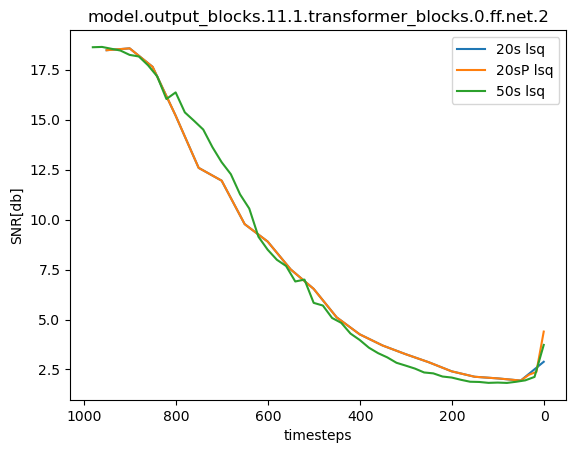

In [80]:
f,ax = plt.subplots()
#ax.plot(ds_20_uni,calc_snr_key(n20_uniform,q20_rtn_uniform,k)[1:],label='20 steps rtn')
ax.plot(ds_20_uni,calc_snr_key(n20_uniform,q20_lsq_uniform,k)[1:],label='20s lsq')
ax.plot(ds_20_uniP,calc_snr_key(n20_uniformP,q20_lsq_uniformP,k)[1:],label='20sP lsq')
#ax.plot(ds_20_uni,calc_snr_key(n20_uniform,q20_rtn_uniform_ff,k)[1:],label='20s rtn ff')
#ax.plot(ds_50_uni,calc_snr_key(n50_uniform,q50_rtn_uniform,k)[1:],label='50 steps rtn')
ax.plot(ds_50_uni,calc_snr_key(n50_uniform,q50_lsq_uniform,k)[1:],label='50s lsq')

#ax.plot(ds_50_uni,calc_snr_key()[1:],label='50 steps')
#ax.plot(ds_20_uni,calc_snr_key()[1:],label='20 steps ff')
#ax.plot(ds_50_uni,calc_snr_key()[1:],label='50 steps ff')    
ax.legend()
ax.set_title(k)
ax.invert_xaxis()
ax.set_xlabel('timesteps')
ax.set_ylabel('SNR[db]')

In [81]:
folder='/workspace/sd/ver_images_outputs/puppy/lsq8-rtn-20s'
n20 = dict(np.load(f'{folder}/outputs_act_quant=False.npz',allow_pickle=True))#.items()
q20 = dict(np.load(f'{folder}/outputs_act_quant=True.npz',allow_pickle=True))
n20 = n20['arr_0'].item()
q20 = q20['arr_0'].item()

In [82]:
folder='/workspace/sd/ver_images_outputs/puppy/lsq8-rtn-50s'
n50 = dict(np.load(f'{folder}/outputs_act_quant=False.npz',allow_pickle=True))#.items()
q50 = dict(np.load(f'{folder}/outputs_act_quant=True.npz',allow_pickle=True))
n50 = n50['arr_0'].item()
q50 = q50['arr_0'].item()

In [84]:
folder='/workspace/sd/ver_images_outputs/puppy'
ff50 = dict(np.load(f'{folder}/lsq8-rtn-50s_ff/outputs_act_quant=True.npz',allow_pickle=True))#.items()
ff20 = dict(np.load(f'{folder}/lsq8-rtn-20s_ff/outputs_act_quant=True.npz',allow_pickle=True))
ff50 = ff50['arr_0'].item()
ff20 = ff20['arr_0'].item()

In [85]:
#ff50
#type(dict(n20.items())['arr_0'])
#['model.input_blocks.1.1.transformer_blocks.0.ff.net.0.proj']

In [86]:
k = list(ff20.keys())

In [87]:
n20[k[0]].shape

(21, 2, 4096, 2560)

In [88]:
calc_snr = lambda x,y : 10*np.log10(np.mean(x**2)/np.mean((x-y)**2))

In [89]:
def calc_snr_key(n20,q20,key):
    return [ calc_snr(n20[key][i],q20[key][i]) for i in range(n20[key].shape[0])]

In [90]:
k[-1]

'model.output_blocks.11.1.transformer_blocks.0.ff.net.2'

In [97]:
print(k[-1])
s20 = calc_snr_key(n20,q20,k[-1])
s50 = calc_snr_key(n50,q50,k[-1])

model.output_blocks.11.1.transformer_blocks.0.ff.net.2


In [92]:
k[2]

'model.input_blocks.2.1.transformer_blocks.0.ff.net.0.proj'

In [98]:
print(k[-1])
s20ff = calc_snr_key(n20,ff20,k[-1])
s50ff = calc_snr_key(n50,ff50,k[-1])

model.output_blocks.11.1.transformer_blocks.0.ff.net.2


In [137]:
ddim_timesteps_20 = make_ddim_timesteps(ddim_discr_method="quad", num_ddim_timesteps=20,
                                                  num_ddpm_timesteps=1000)

Selected timesteps for ddim sampler: [  1   3   9  20  36  56  80 109 142 180 222 269 320 375 435 499 568 641
 719 801]


In [138]:
ddim_timesteps_20 = make_ddim_timesteps(ddim_discr_method="uniform", num_ddim_timesteps=20,
                                                  num_ddpm_timesteps=1000)

Selected timesteps for ddim sampler: [  1  51 101 151 201 251 301 351 401 451 501 551 601 651 701 751 801 851
 901 951]


In [ ]:
ddim_timesteps_20

In [94]:
from ldm.modules.diffusionmodules.util import make_ddim_sampling_parameters, make_ddim_timesteps, noise_like

ddim_timesteps_50 = make_ddim_timesteps(ddim_discr_method="uniform", num_ddim_timesteps=50,
                                                  num_ddpm_timesteps=1000)
ddim_timesteps_20 = make_ddim_timesteps(ddim_discr_method="uniform", num_ddim_timesteps=20,
                                                  num_ddpm_timesteps=1000)
ddim_timesteps_20 = np.flip(ddim_timesteps_20)
ddim_timesteps_50 = np.flip(ddim_timesteps_50)


Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected timesteps for ddim sampler: [  1  51 101 151 201 251 301 351 401 451 501 551 601 651 701 751 801 851
 901 951]


In [95]:
len(ddim_timesteps_20)

20

Text(0, 0.5, 'SNR[db]')

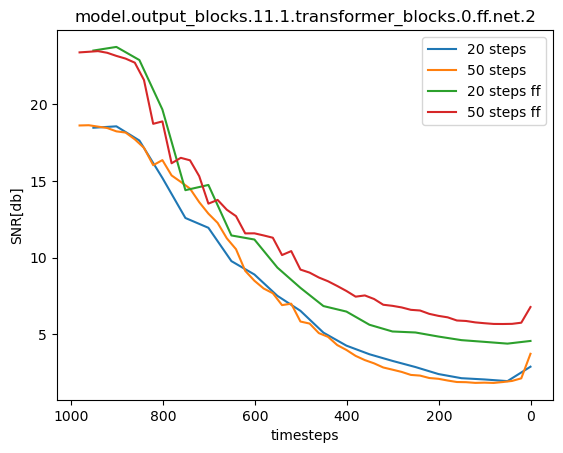

In [99]:
f,ax = plt.subplots()
ax.plot(ddim_timesteps_20,s20[1:],label='20 steps')
ax.plot(ddim_timesteps_50,s50[1:],label='50 steps')
ax.plot(ddim_timesteps_20,s20ff[1:],label='20 steps ff')
ax.plot(ddim_timesteps_50,s50ff[1:],label='50 steps ff')    
ax.legend()
ax.set_title(k[-1])
ax.invert_xaxis()
ax.set_xlabel('timesteps')
ax.set_ylabel('SNR[db]')

In [ ]:
print(k[0])
calc_snr_key(n20,q20,k[2])

model.input_blocks.1.1.transformer_blocks.0.ff.net.0.proj


[21.72661781311035,
 21.437995433807373,
 21.726365089416504,
 20.55222511291504,
 18.82064938545227,
 16.400301456451416,
 15.397697687149048,
 14.89408254623413,
 14.493814706802368,
 13.10482144355774,
 12.610267400741577,
 11.894510984420776,
 10.738259553909302,
 10.500990152359009,
 9.551621079444885,
 9.057884216308594,
 8.496097326278687,
 7.8500038385391235,
 7.336477637290955,
 6.649942398071289,
 5.18532931804657]

In [ ]:
from gen_ver_images import gen_ver_images

In [ ]:
import torch
torch.set_warn_always(False)

In [ ]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES']

In [ ]:
import pandas as pd
df = pd.read_csv('exp.csv')

In [ ]:
df.columns

In [ ]:
ind = 0

In [ ]:
df.iloc[ind]

In [ ]:
import yaml
from pathlib import Path
prompts  = yaml.load(
                open(f'{Path.home()}/q-diffusion/scripts/prompt.yaml','r'),Loader=yaml.FullLoader
                )

In [ ]:
prompts[0]

In [ ]:
for ind, (_,prompt,seed) in enumerate(prompts[:6]):
    print(ind,prompt,seed)

In [ ]:
prompts[0][0]

In [ ]:
grid = gen_ver_images(cali_ckpt= df.cali_ckpt[ind],
                      nbit= df.bit[ind],
                      symmetric= df.symmetric[ind],
                      quant_act_ops= df.quant_act_ops[ind],
                      ddim_steps= int(df.ddim_steps[ind]),
                      act_bits= df.act_bits[ind],
                      split_to_16bits= df.split_to_16bits[ind],
                      naive_quant_weights= df.naive_quant_weights[ind],
                      num_images = 2 )

In [ ]:
g = np.array(grid)

In [ ]:
plt.imshow(g)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(grid)

In [ ]:
%debug

In [ ]:
bin(1)

In [ ]:
format(-5, '08b')

In [ ]:
int('0b11111011', 2)


In [ ]:
def twos_complement(n, bits=8):
    return bin(n & (2**bits - 1))  #

In [ ]:
for i in range(0,128):
    b = twos_complement(-i, 8)
    print(i, int(b, 2),256-i,(i+256) % 256)